## 🔧 Step 1: Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Step 2: Load Processed Dataset


In [2]:
file_path = r"C:\Users\Sai Vennela Jagadesh\OneDrive\Documents\Guvi Capstone Projects\Household Energy Forecast\Data\processed_energy_dataset.csv"
df = pd.read_csv(file_path)

## 🎯 Step 3: Define Features and Target

In [3]:
# Use only scaled features
features = [
    'Global_reactive_power_scaled', 'Voltage_scaled', 'Global_intensity_scaled',
    'Sub_metering_1_scaled', 'Sub_metering_2_scaled', 'Sub_metering_3_scaled',
    'Daily_avg_power_scaled', 'Rolling_avg_power_60min_scaled', 'Is_Peak_Hour'
]

X = df[features]
y = df['Global_active_power_scaled']


## ✂️ Step 4: Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🧠 Step 5: Train Regression Models

In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "MAE": mean_absolute_error(y_test, preds),
        "R2": r2_score(y_test, preds)
    }

results_df = pd.DataFrame(results).T
results_df.sort_values("RMSE", inplace=True)
results_df

,RMSE,MAE,R2
Neural Network (MLP),0.028385,0.017399,0.999199
Gradient Boosting,0.029620,0.018248,0.999127
Random Forest,0.032526,0.019196,0.998948
Linear Regression,0.037787,0.024222,0.998580


## 📊 Step 6: Visual Comparison of Model Performance


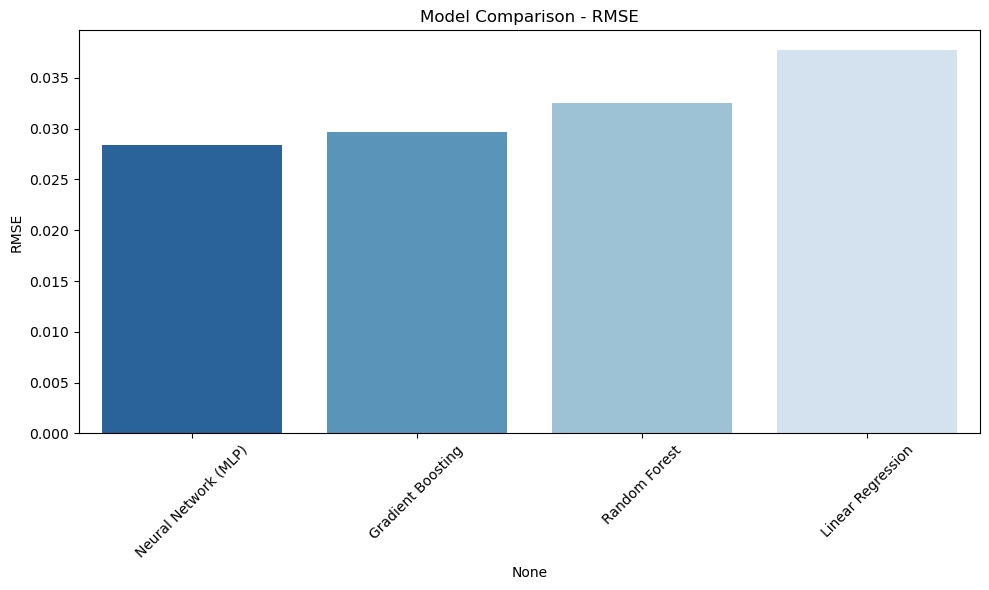

,RMSE,MAE,R2
Neural Network (MLP),0.028385,0.017399,0.999199
Gradient Boosting,0.029620,0.018248,0.999127
Random Forest,0.032526,0.019196,0.998948
Linear Regression,0.037787,0.024222,0.998580


In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["RMSE"], hue=results_df.index, palette="Blues_r", legend=False)
plt.title("Model Comparison - RMSE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
results_df.sort_values("RMSE").style.highlight_min(color='lightgreen', subset=['RMSE', 'MAE']) \
                                     .highlight_max(color='lightblue', subset=['R2'])

## 🏆 Step 7: Best Model Summary
We found the best performing model based on lowest **RMSE**, with supporting scores in **MAE** and **R²**.

Next steps could involve:
- Feature selection techniques
- Tuning more hyperparameters using `GridSearchCV`
- Using this model in forecasting

## 🧪 Step 8: Hyperparameter Tuning with GridSearchCV
We will tune Gradient Boosting and MLP (Neural Network) using GridSearchCV to improve performance.

=======================================================================

# Gradient Boosting Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)
print("🔍 Best Gradient Boosting Params:", gb_grid.best_params_)
print("✅ Best RMSE (Gradient Boosting):", -gb_grid.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
🔍 Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
✅ Best RMSE (Gradient Boosting): 0.027808052252954657


# MLPRegressor Tuning

In [9]:
mlp_params = {
    'hidden_layer_sizes': [(64,), (64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'max_iter': [300]
}

mlp_grid = GridSearchCV(
    MLPRegressor(random_state=42),
    mlp_params,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

mlp_grid.fit(X_train, y_train)
print("🔍 Best MLP Params:", mlp_grid.best_params_)
print("✅ Best RMSE (MLP):", -mlp_grid.best_score_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
🔍 Best MLP Params: {'activation': 'relu', 'hidden_layer_sizes': (64, 32), 'max_iter': 300, 'solver': 'adam'}
✅ Best RMSE (MLP): 0.028366566190416942
